Develop a program to create histograms for all numerical features and analyze the distribution
of each feature. Generate box plots for all numerical features and identify any outliers. Use
California Housing dataset.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [9]:
data = fetch_california_housing(as_frame=True)
housing_data = data.frame

In [12]:
numerical_features = housing_data.select_dtypes(include=[np.number]).columns

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

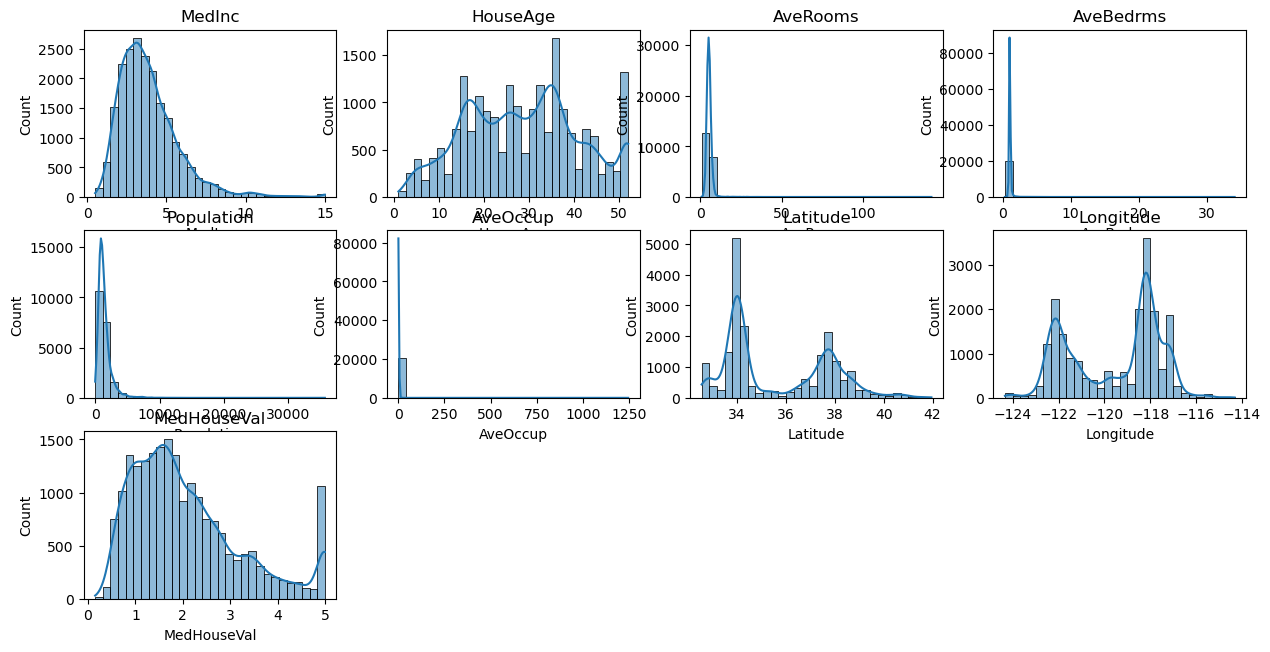

In [19]:
# Histogram plot for all the numerical features
plt.figure(figsize=(15,10))
counter = 0
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(housing_data[feature], kde=True, bins=30)
    plt.title(feature)
plt.show()

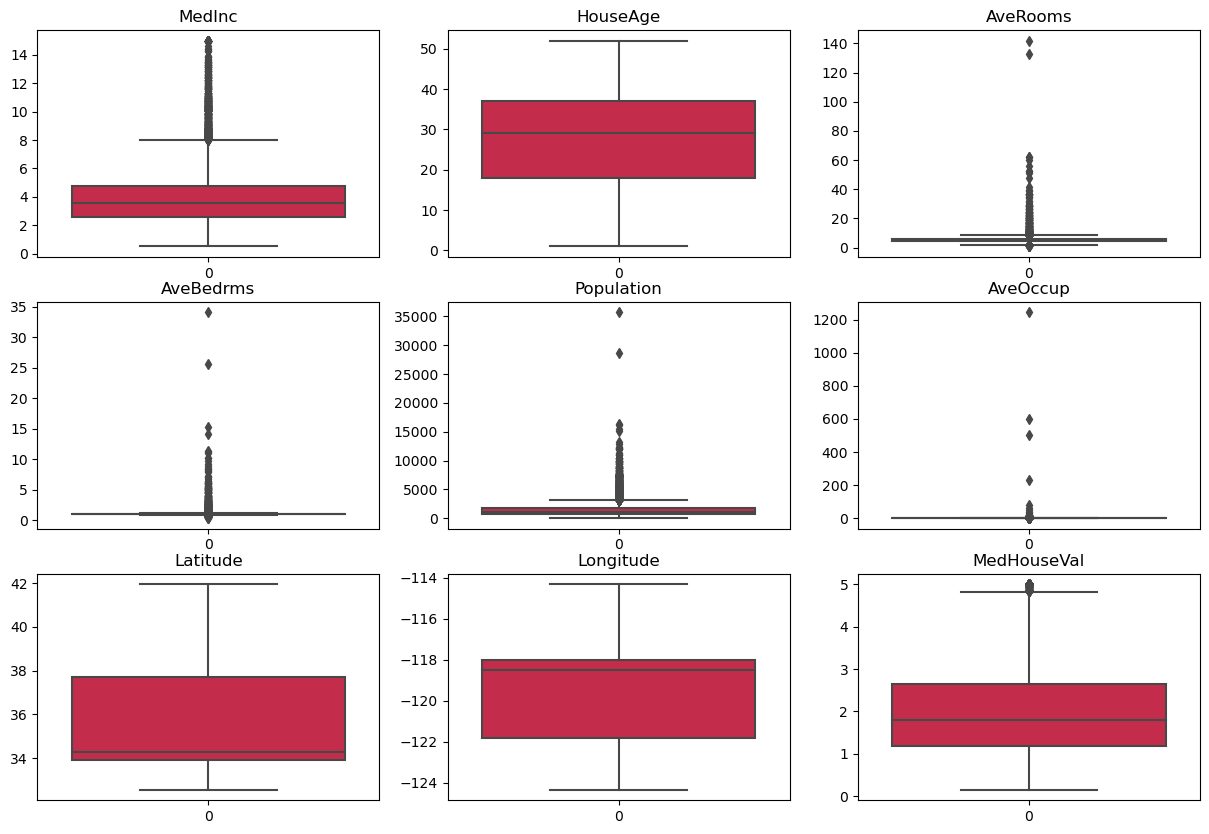

In [20]:
# box plots
plt.figure(figsize=(15,10))
for idx, feature in enumerate(numerical_features):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(housing_data[feature], color="crimson")
    plt.title(feature)
plt.show()

In [28]:
# identifying outliers
outliers_summary = {}

for feature in numerical_features:
    q1 = housing_data[feature].quantile(.25)
    q3 = housing_data[feature].quantile(.75)
    iqr = q3 - q1

    lower_bound = (q1 - 1.5) * iqr
    upper_bound = (q3 + 1.5) * iqr

    outliers = housing_data[(housing_data[feature] < lower_bound) | (housing_data[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)

print(outliers_summary)





{'MedInc': 4013, 'HouseAge': 20640, 'AveRooms': 7147, 'AveBedrms': 20640, 'Population': 20640, 'AveOccup': 1591, 'Latitude': 20640, 'Longitude': 20640, 'MedHouseVal': 0}


In [29]:
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010
